# <center>ARE RUNNING BACKS UNDERVALUED IN TODAY'S NFL?!?!?</center>

In [152]:
pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import csv

#Claim 1: There is an increased focus on passing offenses

In [154]:
df_passing_per_game = pd.read_html('https://www.pro-football-reference.com/years/NFL/passing.htm')[0]

df_passing_per_game.columns = [' '.join(col).replace('Unnamed', '').replace(':', '').strip() for col in df_passing_per_game.columns.values]
df_passing_per_game.columns = [re.sub(r'\d*_level_\d*', "", col).strip() for col in df_passing_per_game.columns]

df_passing_per_game = df_passing_per_game[df_passing_per_game['Rk'].notnull()]
df_passing_per_game = df_passing_per_game[df_passing_per_game['Rk'] != 'Rk']

df_passing_per_game = df_passing_per_game.apply(lambda col: pd.to_numeric(col, errors='coerce'))

In [155]:
df_passing_totals =  pd.read_html('https://www.pro-football-reference.com/years/NFL/passing.htm')[1]

df_passing_totals.columns = [' '.join(col).replace('Unnamed', '').replace(':', '').strip() for col in df_passing_totals.columns.values]
df_passing_totals.columns = [re.sub(r'\d*_level_\d*', "", col).strip() for col in df_passing_per_game.columns]

df_passing_totals = df_passing_totals[df_passing_totals['Rk'].notnull()]
df_passing_totals = df_passing_totals[df_passing_totals['Rk'] != 'Rk']

df_passing_totals = df_passing_totals.apply(lambda col: pd.to_numeric(col, errors='coerce'))

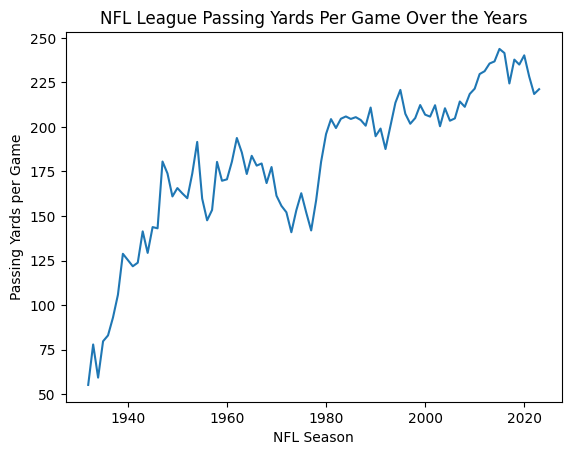

In [156]:
df_passing_per_game['Year'] = pd.to_numeric(df_passing_per_game['Year'], errors='coerce')
df_passing_per_game['Passing Yds'] = pd.to_numeric(df_passing_per_game['Passing Yds'], errors='coerce')

ax_passing_per_game = sns.lineplot(x='Year', y='Passing Yds', data=df_passing_per_game).set(xlabel = 'NFL Season', ylabel = 'Passing Yards per Game', title='NFL League Passing Yards Per Game Over the Years')


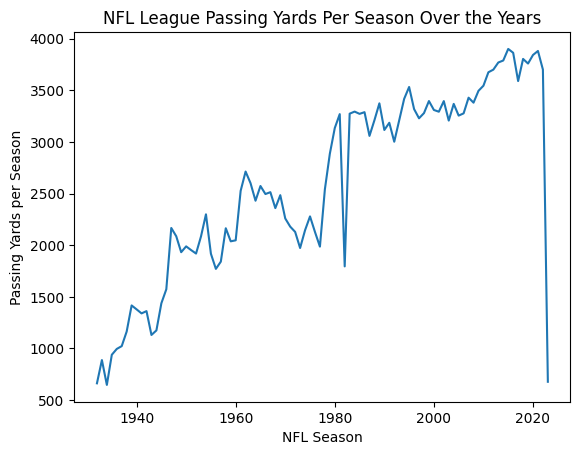

In [157]:
#Keep in mind that if the final value is an outlier then it may be due to the season still being in progress. Uncomment the next piece of code to omit the current season. If the code is uncommented, make sure to either run this cell only once or to run all cells from the beginning.

#df_passing_totals.drop(0, inplace=True)

ax_passing_per_season = sns.lineplot(x='Year', y='Passing Yds', data=df_passing_totals).set(xlabel = 'NFL Season', ylabel = 'Passing Yards per Season', title='NFL League Passing Yards Per Season Over the Years')

In [158]:
df_rushing_receiving_per_game = pd.read_html('https://www.pro-football-reference.com/years/NFL/rushing.htm')[0]

df_rushing_receiving_per_game.columns = [' '.join(col).replace('Unnamed', '').replace(':', '').strip() for col in df_rushing_receiving_per_game.columns.values]
df_rushing_receiving_per_game.columns = [re.sub(r'\d*_level_\d*', "", col).strip() for col in df_rushing_receiving_per_game.columns]

df_rushing_receiving_per_game = df_rushing_receiving_per_game[df_rushing_receiving_per_game['Rk'].notnull()]
df_rushing_receiving_per_game = df_rushing_receiving_per_game[df_rushing_receiving_per_game['Rk'] != 'Rk']

df_rushing_receiving_per_game = df_rushing_receiving_per_game.apply(lambda col: pd.to_numeric(col, errors='coerce'))

In [159]:
df_rushing_receiving_totals = pd.read_html('https://www.pro-football-reference.com/years/NFL/rushing.htm')[1]

df_rushing_receiving_totals.columns = [' '.join(col).replace('Unnamed', '').replace(':', '').strip() for col in df_rushing_receiving_totals.columns.values]
df_rushing_receiving_totals.columns = [re.sub(r'\d*_level_\d*', "", col).strip() for col in df_rushing_receiving_totals.columns]

df_rushing_receiving_totals = df_rushing_receiving_totals[df_rushing_receiving_totals['Rk'].notnull()]
df_rushing_receiving_totals = df_rushing_receiving_totals[df_rushing_receiving_totals['Rk'] != 'Rk']

df_rushing_receiving_totals = df_rushing_receiving_totals.apply(lambda col: pd.to_numeric(col, errors='coerce'))

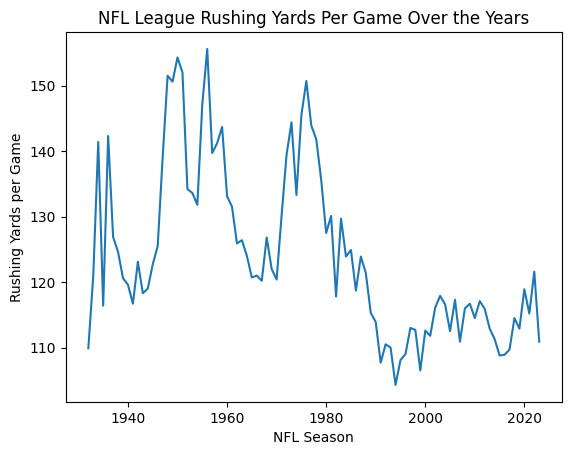

In [160]:
ax_rushing_per_game = sns.lineplot(x='Year', y='Rushing Yds', data=df_rushing_receiving_per_game).set(xlabel = 'NFL Season', ylabel = 'Rushing Yards per Game', title='NFL League Rushing Yards Per Game Over the Years')

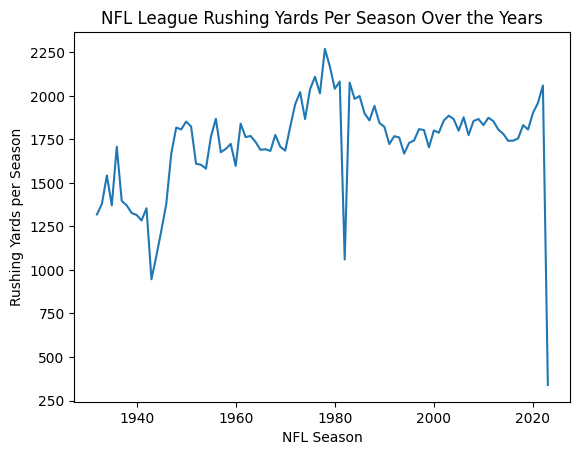

In [161]:
#Keep in mind that if the final value is an outlier then it may be due to the season still being in progress. Uncomment the next piece of code to omit the current season. If the code is uncommented, make sure to either run this cell only once or to run all cells from the beginning.

#df_rushing_receiving_totals.drop(0, inplace=True)

ax_rushing_per_season = sns.lineplot(x='Year', y='Rushing Yds', data=df_rushing_receiving_totals).set(xlabel = 'NFL Season', ylabel = 'Rushing Yards per Season', title='NFL League Rushing Yards Per Season Over the Years')

In [162]:
#df_rush_attempts_full_season = pd.read_csv('TeamRankings Player Rush Attempts in the 2022 NFL Season.csv')

#NOTE: The season_id within the URL refers to the season, with the most current season getting an id value of 21. The oldest season available will have a value of 1 and will refer to 20 seasons prior to the current season. Any season data more than 20 years older than the current season will be unavailable. Since this notebook is being produced during the 2023 season, the season_id is currently 20 to refer to the 2022 season. The choice to choose a season_id is yours, but for the data to be translated properly it is advised to use a fully completed season id which translates so a season_id value lower than 21.

df_rush_attempts_full_season = pd.read_html('https://www.teamrankings.com/nfl/player-stat/rushing-plays?season_id=20')[0]

In [163]:
df_rush_rb_full_season = df_rush_attempts_full_season[(df_rush_attempts_full_season['Pos'] == 'RB') | (df_rush_attempts_full_season['Pos'] == 'HB')]

player_group_1 = df_rush_rb_full_season.iloc[0:24, :]
player_group_2 = df_rush_rb_full_season.iloc[25:49, :]
player_group_3 = df_rush_rb_full_season.iloc[50:78, :]

player_att_1 = player_group_1.groupby('Team')['Value'].sum()
player_att_2 = player_group_2.groupby('Team')['Value'].sum()
player_att_3 = player_group_3.groupby('Team')['Value'].sum()

player_att_index = pd.DataFrame(df_rush_attempts_full_season.Team.unique())

player_att_index.rename(columns={0: "Team"}, inplace=True)



player_att_1 = pd.merge(player_att_1, player_att_index, on='Team', how='outer')
player_att_1['Value'].fillna(0, inplace=True)
player_att_1.sort_values('Team', inplace=True)
player_att_1.reset_index(drop=True, inplace=True)

player_att_2 = pd.merge(player_att_2, player_att_index, on='Team', how='outer')
player_att_2['Value'].fillna(0, inplace=True)
player_att_2.sort_values('Team', inplace=True)
player_att_2.reset_index(drop=True, inplace=True)

player_att_3 = pd.merge(player_att_3, player_att_index, on='Team', how='outer')
player_att_3['Value'].fillna(0, inplace=True)
player_att_3.sort_values('Team', inplace=True)
player_att_3.reset_index(drop=True, inplace=True)



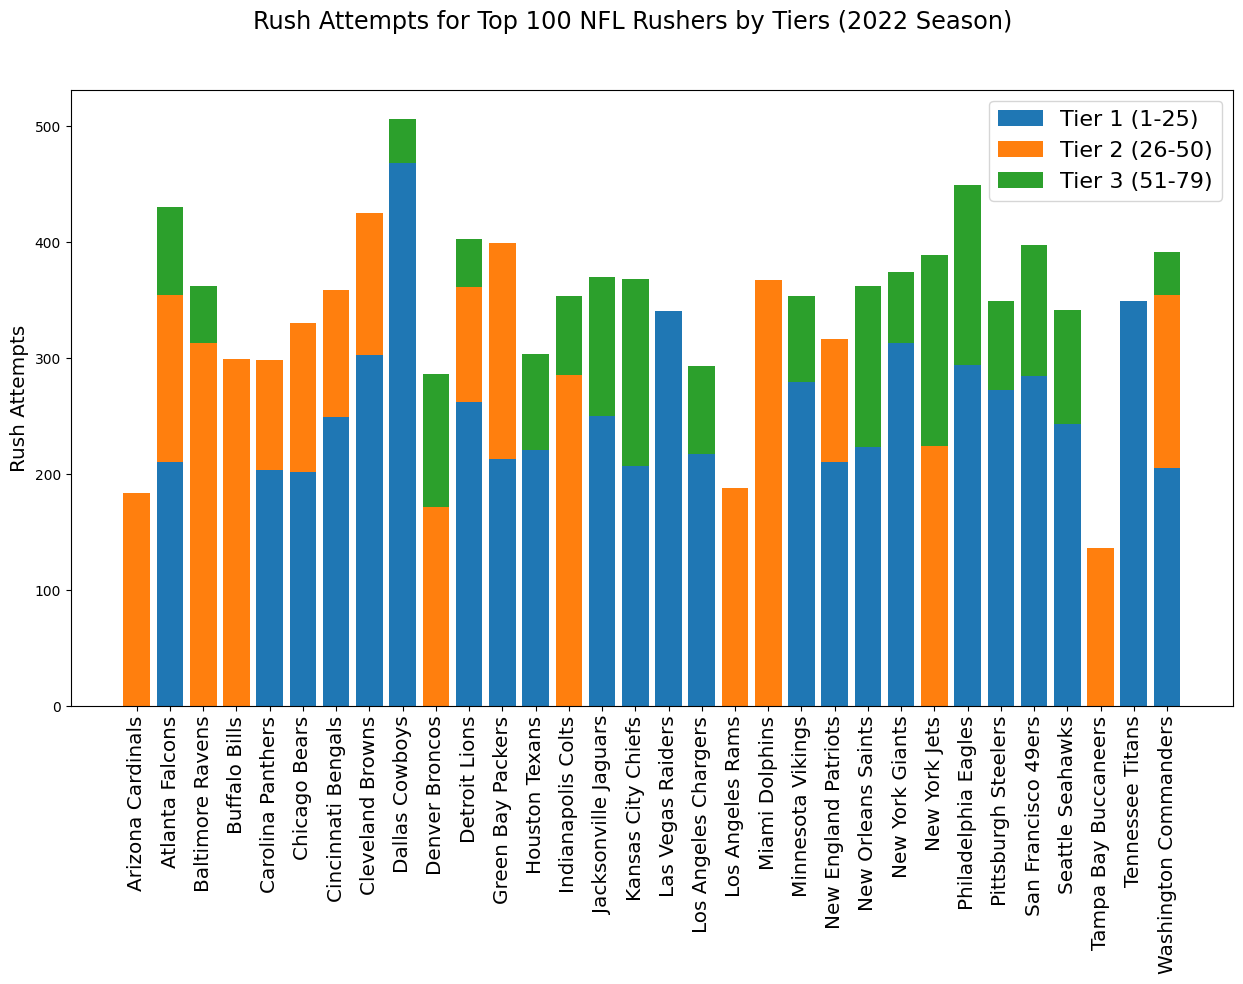

In [164]:
plt.figure(figsize=(15,8))

p1 = plt.bar(player_att_1['Team'], player_att_1['Value'], label='Tier 1 (1-25)')
p2 = plt.bar(player_att_2['Team'], player_att_2['Value'], label='Tier 2 (26-50)', bottom=player_att_1['Value'])
p3 = plt.bar(player_att_3['Team'], player_att_3['Value'], label='Tier 3 (51-79)', bottom=player_att_1['Value']+player_att_2['Value'])
    
plt.xticks(rotation=90, fontsize='x-large')
plt.suptitle('Rush Attempts for Top 100 NFL Rushers by Tiers (2022 Season)', fontsize='xx-large')
plt.ylabel('Rush Attempts', fontsize='x-large')
plt.legend(fontsize=16);